# play with useful integrals for window time filtering

In [59]:
import numpy as np
import xarray as xr

%matplotlib inline
import matplotlib.pyplot as plt

import sympy as sym
from sympy import Abs, exp, I, cos
from sympy.printing.latex import LatexPrinter, print_latex
sym.init_printing()

In [2]:
# define useful parameters
tau, omega, omega0 = sym.symbols('tau, omega, omega_0', positive=True)
t1, t2 = sym.symbols('t1, t2')

---

## slow variance contribution

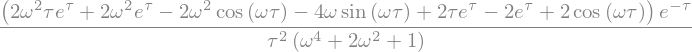

In [3]:
It = (sym.integrate(exp(-Abs(t1-t2))
                    *cos(omega*(t1-t2)),
                   (t1, -tau/2, tau/2), 
                   (t2, -tau/2, tau/2))
      /tau**2
     )
It = It.simplify()
It

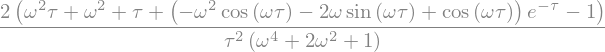

In [5]:
em = sym.symbols('em', positive=True) # temporary variable useful for simplifications
It = It.subs(exp(tau), 1/em).simplify().subs(em, exp(-tau))
It

In [6]:
print_latex(It)

\frac{2 \left(\omega^{2} \tau + \omega^{2} + \tau + \left(- \omega^{2} \cos{\left(\omega \tau \right)} - 2 \omega \sin{\left(\omega \tau \right)} + \cos{\left(\omega \tau \right)}\right) e^{- \tau} - 1\right)}{\tau^{2} \left(\omega^{4} + 2 \omega^{2} + 1\right)}


### general properties

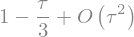

In [7]:
# value when tau is 0
It.series(tau, 0, 2).simplify()

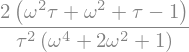

In [8]:
# asymptotic behavior for large tau
It.subs(exp(-tau), 0) #.series(tau, sym.oo, 2).simplify()

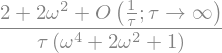

In [57]:
It.subs(exp(-tau), 0).series(tau, sym.oo, 2).simplify()

### moving average case:

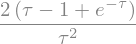

In [11]:
It.subs(omega,0)

In [68]:
print_latex(It.subs(omega,0))

\frac{2 \left(\tau - 1 + e^{- \tau}\right)}{\tau^{2}}


### some plots

In [84]:
It_f = sym.lambdify((tau, omega), It, 'numpy')
ds = xr.Dataset(coords={'tau': np.arange(.1,10.,.1), 
                        'omega': np.arange(0.,10.,.1)})
ds['It'] = (['tau', 'omega'], It_f((ds.tau+ds.omega*0.).values, (ds.tau*0.+ds.omega).values))

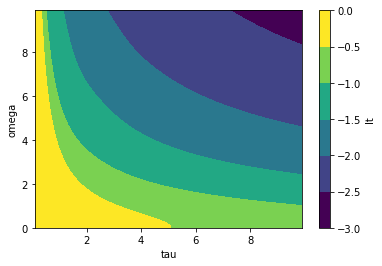

In [85]:
np.log10(ds['It']).plot.contourf(x='tau')

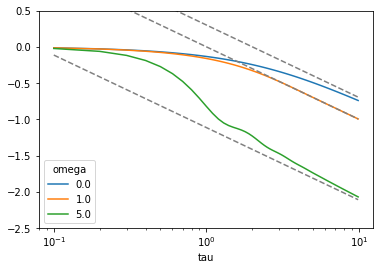

In [86]:
fig, ax = plt.subplots()

np.log10(ds['It']).sel(omega=[0, 1, 5], method='nearest').plot.line(ax=ax, x='tau', xscale='log')

It_tau_oo = 2/ds.tau/(1+ds.omega**2)
np.log10(It_tau_oo).sel(omega=[0, 1, 5], method='nearest').plot.line(ax=ax, x='tau', ls='--', color='0.5', xscale='log', add_legend=False)

ax.set_ylim((-2.5,.5))

---
## non-stationary variance contribution

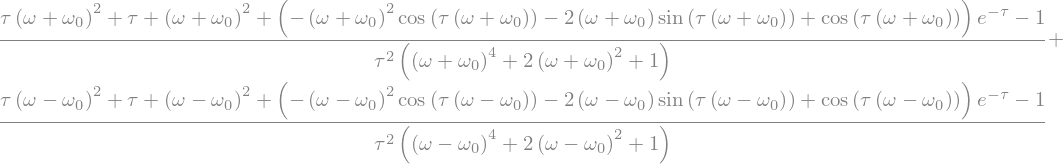

In [69]:
Ip = It.subs(omega, omega+omega0)/2 + It.subs(omega, omega-omega0)/2
Ip

In [70]:
print_latex(Ip)

\frac{\tau \left(\omega + \omega_{0}\right)^{2} + \tau + \left(\omega + \omega_{0}\right)^{2} + \left(- \left(\omega + \omega_{0}\right)^{2} \cos{\left(\tau \left(\omega + \omega_{0}\right) \right)} - 2 \left(\omega + \omega_{0}\right) \sin{\left(\tau \left(\omega + \omega_{0}\right) \right)} + \cos{\left(\tau \left(\omega + \omega_{0}\right) \right)}\right) e^{- \tau} - 1}{\tau^{2} \left(\left(\omega + \omega_{0}\right)^{4} + 2 \left(\omega + \omega_{0}\right)^{2} + 1\right)} + \frac{\tau \left(\omega - \omega_{0}\right)^{2} + \tau + \left(\omega - \omega_{0}\right)^{2} + \left(- \left(\omega - \omega_{0}\right)^{2} \cos{\left(\tau \left(\omega - \omega_{0}\right) \right)} - 2 \left(\omega - \omega_{0}\right) \sin{\left(\tau \left(\omega - \omega_{0}\right) \right)} + \cos{\left(\tau \left(\omega - \omega_{0}\right) \right)}\right) e^{- \tau} - 1}{\tau^{2} \left(\left(\omega - \omega_{0}\right)^{4} + 2 \left(\omega - \omega_{0}\right)^{2} + 1\right)}


### general properties

In [72]:
# value when tau is 0, should inherit values from It
# but calculation is pretty slow
#Ip.series(tau, 0, 2).simplify()

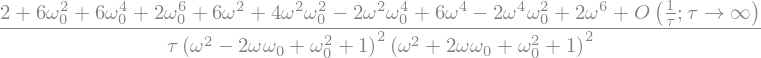

In [73]:
# asymptotic behavior for large tau
Ip.subs(exp(-tau), 0).series(tau, sym.oo, 2).simplify().factor()

### moving average case

The moving averaged case for the non-stationary variance contribution is equivalent to that associated with the slow turbulence with $\omega=\omega_0$.

### demodulation case

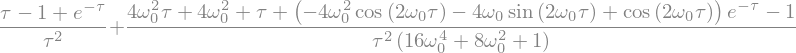

In [76]:
Ip_omega0 = Ip.subs(omega,omega0)
Ip_omega0

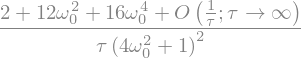

In [38]:
Ip_omega0.subs(exp(-tau), 0).series(tau, sym.oo, 2).simplify().factor()

### some plots

In [87]:
Ip_omega0_f = sym.lambdify((tau, omega0), Ip_omega0, 'numpy')
ds['Ip_omega_0'] = (['tau', 'omega'], Ip_omega0_f((ds.tau+ds.omega*0.).values, (ds.tau*0.+ds.omega).values))

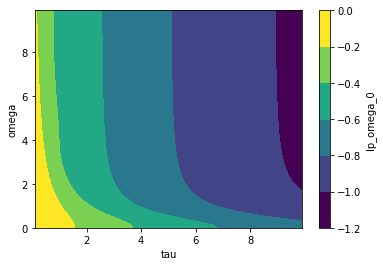

In [88]:
np.log10(ds['Ip_omega_0']).plot.contourf(x='tau')

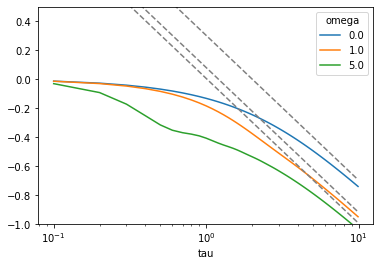

In [89]:
fig, ax = plt.subplots()

np.log10(ds['Ip_omega_0']).sel(omega=[0, 1, 5], method='nearest').plot.line(ax=ax, x='tau', xscale='log')

Ip_tau_oo = (2+12*ds.omega**2+16*ds.omega**4)/ds.tau/(1+4*ds.omega**2)**2
np.log10(Ip_tau_oo).sel(omega=[0, 1, 5], method='nearest').plot.line(ax=ax, x='tau', ls='--', color='0.5', xscale='log', add_legend=False)

ax.set_ylim((-1.,.5))

---
# old stuff

In [ ]:
# complex approach
It = (sym.integrate(exp(I*omega*(t1-t2)-Abs(t1-t2)), 
                   (t1, -tau/2, tau/2), 
                   (t2, -tau/2, tau/2))
      /tau**2
     )
It_r, It_i = It.as_real_imag()
It

In [ ]:
# verifies imaginary part is null:
sym.expand_complex(It_i)

In [ ]:
em = sym.symbols('em', positive=True) # temporary variable useful for simplifications
It = (sym.expand_complex(It_r)
      .subs(exp(tau), 1/em)
      .simplify()
      .collect(omega)
      .subs(em, exp(-tau))
     )
It